<a href="https://colab.research.google.com/github/TajGama/Ajustamento-de-Observa-es-/blob/main/Atividade_em_Sala_txt_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/quickstart_colab"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1cGC7ms08UvRrlMmu4LZDWc0fCZk9rAka?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/TajGama/Ajustamento-de-Observa-es-.git"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
   <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/quickstart_colab"><img src="https://mybinder.org/static/logo.svg?v=fe52c40adc69454ba7536393f76ebd715e5fb75f5feafe16a27c47483eabf3311c14ed9fda905c49915d6dbf369ae68fb855a40dd05489a7b9542a9ee532e92b" height="32" width="32" />View on Mybinder</a>
  </td>
  
</table>




# Fluxo Grama de Etapas do Ajustamento

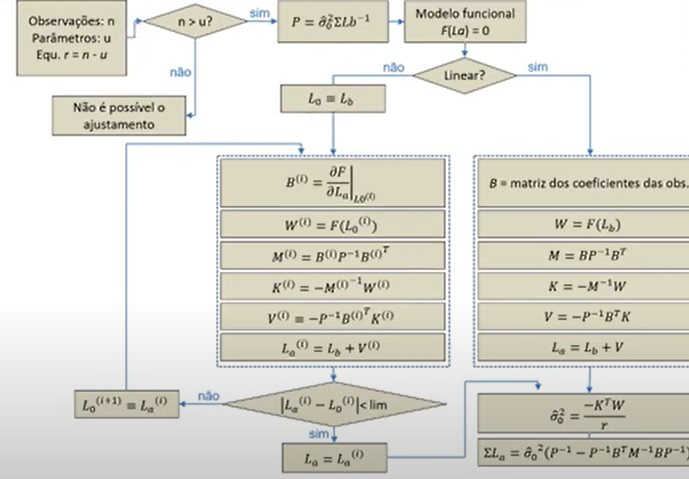

# Exercício de Fixação
> Prof. Erison Barros

> Aluno: Thiago Gama de Lima

> CA412 - Ajustamento de Observações II 2024.1

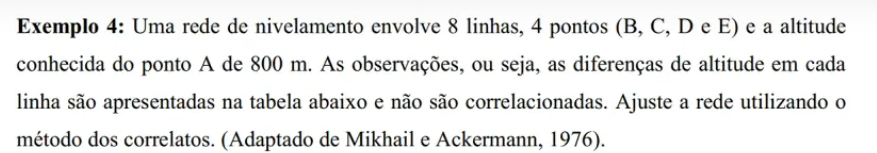

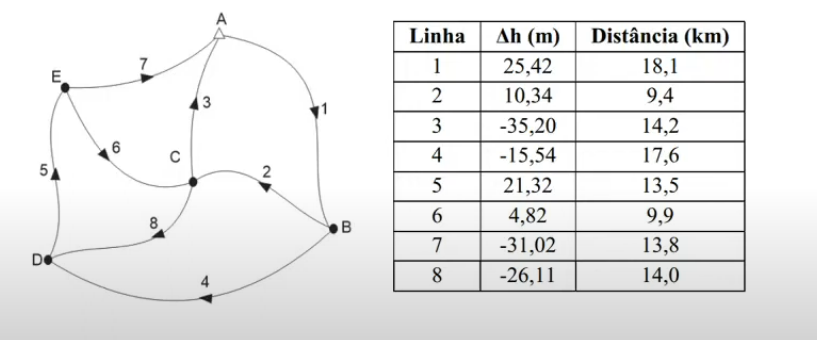

## Responda:

In [50]:
import numpy as np
import sympy as sp


v1,v2,v3,v4,v5,v6,v7 = sp.symbols('v1 v2 v3 v4 v5 v6 v7')
v8,v9 = sp.symbols('v8 v9')

 - Número de Observações n:

In [51]:
# Numero de Observações:
 #n=8

In [52]:
n=8

- Número de Parametros u:

In [53]:
# Numero de Parametros
u=4

- Redundancia r=n-u

> Número de Equações de Condição

$r=n-u$

$r=8-4$

**$r=4$**



In [54]:
# Número de Equações de Condição
r=n-u

In [55]:
r

4

## Determinação das Matrizes de Observação

## Altitude A

800 m, dado na questão.

In [56]:
HA=800

## Versão com arquivo txt

Versão do programa com entrada de dados num arquivo txt para montar a matrix

Google drive:
https://drive.google.com/file/d/1eZ1dpHcpHePWZ5dXPHuMWUuqFN_VKhwt/view?usp=sharing

ID do link = 1nqui3AYIDkTAuWgiMq2rloaPQH4JbqEm

Link do gitHub:

https://raw.githubusercontent.com/TajGama/Ajustamento-de-Observa-es-/4fb54f4861d6ab13b2afd3c8f5a7a16708fbfae5/atividade_em_sala_txt.txt



### Distância

Valores da distância na tabela

In [57]:
#Leitura do txt

import pandas as pd

url = "https://raw.githubusercontent.com/TajGama/Ajustamento-de-Observa-es-/4fb54f4861d6ab13b2afd3c8f5a7a16708fbfae5/atividade_em_sala_txt.txt"

txt = pd.read_csv(url, sep=";",decimal=",")

#Preenchendo matrix D e LB com arquivo txt
D = []
for i in range(8): #Modificar manualmente o tamanho da Matriz
  D.append(txt.iloc[i,2])
Lb = []
for i in range(8):
  Lb.append(txt.iloc[i,1])

In [58]:
Lb

[25.42, 10.34, -35.2, -15.54, 21.32, 4.82, -31.02, -26.11]

In [59]:
#D= np.array([18.1, 9.4, 14.2, 17.6, 13.5, 9.9,13.8, 14.0])

In [60]:
#D

### Vetor das Observações (Lb)


In [61]:
#LB=np.array([[25.42],[10.34],[-35.20],[-15.54],[21.32],[4.82],[-31.02],[-26.11]])

## Equações F(La)=o

In [62]:
eq1 = v1 + v2 + v3
eq2 = -v2 + v4 - v8
eq3 = v8 + v5 + v6
eq4 = -v3 - v6 + v7

Meq1 = Lb[0] + Lb[1] + Lb[2]
Meq2 = -Lb[1] + Lb[3] - Lb[7]
Meq3 = Lb[7] + Lb[4] + Lb[5]
Meq4 = Lb[6] - Lb[2] - Lb[5]

## Matriz dos Coeficientes *B*

In [63]:
vetorequacao = sp.Matrix([[eq1],[eq2],[eq3],[eq4]])
V=sp.Matrix([v1,v2,v3,v4,v5,v6,v7,v8])
B=np.zeros((4,8))

In [64]:
vetorequacao

Matrix([
[ v1 + v2 + v3],
[-v2 + v4 - v8],
[ v5 + v6 + v8],
[-v3 - v6 + v7]])

In [65]:
num_linha = len(vetorequacao)
num_col = len(V)
num_col

8

In [66]:
num_linha

4

In [67]:
vetorequacao = sp.Matrix([[eq1],[eq2],[eq3],[eq4]])
V=sp.Matrix([v1,v2,v3,v4,v5,v6,v7,v8])
B=np.zeros((4,8))
for i in range(num_linha):
    for j in range(num_col):
          B[i,j] = sp.diff(vetorequacao[i],V[j])

B

array([[ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  1.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.],
       [ 0.,  0., -1.,  0.,  0., -1.,  1.,  0.]])

In [68]:
B=sp.Matrix(B)
B

Matrix([
[1.0,  1.0,  1.0,   0,   0,    0,   0,    0],
[  0, -1.0,    0, 1.0,   0,    0,   0, -1.0],
[  0,    0,    0,   0, 1.0,  1.0,   0,  1.0],
[  0,    0, -1.0,   0,   0, -1.0, 1.0,    0]])

## Vetor do Erro de Fechamento **W**:

Como é uma matriz linear é so aplicar o Somatorio

 W = Matriz com equações utilizadas (eq1 + ... + eq4)

In [69]:
#W=sum(LB) + sum(D)
W2 = sp.Matrix([Meq1,Meq2,Meq3,Meq4])
W = sp.Matrix(W2) # Transformando de numpy para sympy
W

Matrix([
[ 0.560000000000002],
[              0.23],
[0.0300000000000011],
[-0.639999999999997]])

## Matriz dos Pesos **P**

Como as observações são independentes a Matriz P é diagonal, sendo seu elementos dados pelo inverso da distância (D).

In [70]:
Lb

[25.42, 10.34, -35.2, -15.54, 21.32, 4.82, -31.02, -26.11]

In [71]:
D

[18.1, 9.4, 14.2, 17.6, 13.5, 9.9, 13.8, 14.0]

In [72]:
P2 = np.diag(D)
Matrizinv_P = sp.Matrix(P2) # Transformando de numpy para sympy
Matrizinv_P # matriz diagonal P inversa

Matrix([
[18.1,   0,    0,    0,    0,   0,    0,    0],
[   0, 9.4,    0,    0,    0,   0,    0,    0],
[   0,   0, 14.2,    0,    0,   0,    0,    0],
[   0,   0,    0, 17.6,    0,   0,    0,    0],
[   0,   0,    0,    0, 13.5,   0,    0,    0],
[   0,   0,    0,    0,    0, 9.9,    0,    0],
[   0,   0,    0,    0,    0,   0, 13.8,    0],
[   0,   0,    0,    0,    0,   0,    0, 14.0]])

In [73]:
inv_P = np.linalg.inv(P2)
P = sp.Matrix(inv_P)
P # matriz diagonal P

Matrix([
[0.0552486187845304,                 0,                  0,                  0,                  0,                 0,                 0,                  0],
[                 0, 0.106382978723404,                  0,                  0,                  0,                 0,                 0,                  0],
[                 0,                 0, 0.0704225352112676,                  0,                  0,                 0,                 0,                  0],
[                 0,                 0,                  0, 0.0568181818181818,                  0,                 0,                 0,                  0],
[                 0,                 0,                  0,                  0, 0.0740740740740741,                 0,                 0,                  0],
[                 0,                 0,                  0,                  0,                  0, 0.101010101010101,                 0,                  0],
[                 0,                 

## Matriz **M**
$MK + W =  0 $


$M = B  P^{-1}  B^{T}$



In [74]:
M = B @ Matrizinv_P @ B.T
M

Matrix([
[ 41.7,  -9.4,     0, -14.2],
[ -9.4,  41.0, -14.0,     0],
[    0, -14.0,  37.4,  -9.9],
[-14.2,     0,  -9.9,  37.9]])

## Matriz **K**
$K = - M^{-1}  W$

In [75]:
K = -M.inv() @ W
K

Matrix([
[  -0.0110152305018346],
[  -0.0083350063217559],
[-0.000585149462481842],
[   0.0126066160209861]])

## Matriz Resíduos **V**
$ V = P^{-1}  {B^T}  K $

In [76]:
V = Matrizinv_P @ B.T @ K
V

Matrix([
[  -0.199375672083207],
[ -0.0251941072927401],
[  -0.335430220624055],
[  -0.146696111262904],
[-0.00789951774350487],
[  -0.130598478286333],
[   0.173971301089609],
[   0.108497996029837]])

In [77]:
vetorV = np.array(V)
vetorV

array([[-0.199375672083207],
       [-0.0251941072927401],
       [-0.335430220624055],
       [-0.146696111262904],
       [-0.00789951774350487],
       [-0.130598478286333],
       [0.173971301089609],
       [0.108497996029837]], dtype=object)

## Observações Ajustadas  **La**

In [78]:
Lb_array = np.array(Lb)  # Convert the list to a NumPy array
Lb_reshaped = Lb_array.reshape(-1, 1)  # Reshape the array
Lb_reshaped

array([[ 25.42],
       [ 10.34],
       [-35.2 ],
       [-15.54],
       [ 21.32],
       [  4.82],
       [-31.02],
       [-26.11]])

In [79]:
La=Lb_reshaped+vetorV
La

array([[25.2206243279168],
       [10.3148058927073],
       [-35.5354302206241],
       [-15.6866961112629],
       [21.3121004822565],
       [4.68940152171367],
       [-30.8460286989104],
       [-26.0015020039702]], dtype=object)

## Fator de Variância a Posteriore

In [80]:
VTPV=-K.T @ W/r
VTPV

Matrix([[0.00404284231808421]])

## MVC das Observações

In [81]:
abc = VTPV[0,0]
abc

0.00404284231808421

In [82]:
MVC=abc*(Matrizinv_P-Matrizinv_P*B.T*(B*Matrizinv_P*B.T).inv()*(B*Matrizinv_P))
MVC

Matrix([
[ 0.0325854524197881,  -0.0145886893080188,  -0.0179967631117692,  -0.0121537302508964,  -0.0069744673110679,   0.0045395082539455,  -0.0134572548578237,  0.00243495905712241],
[-0.0145886893080188,   0.0226596570003649, -0.00807096769234609,   0.0145417461268652,  0.00332619478260547,  0.00479171609089425, -0.00327925160145185, -0.00811791087349971],
[-0.0179967631117692,  -0.0080709676923461,   0.0260677308041153,  -0.0023880158759688,  0.00364827252846244, -0.00933122434483974,   0.0167365064592756,   0.0056829518163773],
[-0.0121537302508964,   0.0145417461268652,  -0.0023880158759688,   0.0321089338209548,  -0.0130095714228863,  -0.0045576162712033, -0.00694563214717208,   0.0175671876940896],
[-0.0069744673110679,  0.00332619478260547,  0.00364827252846244,  -0.0130095714228863,   0.0288470926847604,  -0.0125113264792687, -0.00886305395080622,  -0.0163357662054917],
[ 0.0045395082539455,  0.00479171609089425, -0.00933122434483974,  -0.0045576162712033,  -0.01251132647926

In [83]:
Posteriori = VTPV / r
Posteriori

Matrix([[0.00101071057952105]])

### VERIFICAÇÂO FINAL

Pegar os valores de La e substituir nas equações para se achar 0!!!

In [84]:
VFeq1 = La[0] + La[1] + La[2]
VFeq2 = -La[1] + La[3] - La[7]
VFeq3= La[7] + La[4] + La[5]
VFeq4 = La[6] - La[2] - La[5]

In [85]:
VF = np.array([VFeq1,VFeq2,VFeq3,VFeq4])
VF

array([[-7.10542735760100e-15],
       [3.55271367880050e-15],
       [8.88178419700125e-16],
       [-8.88178419700125e-16]], dtype=object)

### DESCOBRINDO O VALOR DE B,C,D,E!



In [86]:
HB = HA + La[0]
HC = HB + La[1]
HD = HC + La[7]
HE = HD + La[4]

In [87]:
H = [HA],[HB],[HC],[HD],[HE]
print("    Altura de ABCDE")
H

    Altura de ABCDE


([800],
 [array([825.220624327917], dtype=object)],
 [array([835.535430220624], dtype=object)],
 [array([809.533928216654], dtype=object)],
 [array([830.846028698910], dtype=object)])